# Social Network Analysis @ UNIPI
### 27/06/2023

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
%matplotlib inline

# Second Half

## Exercise 1: Community Evaluation [4 points]

Given the Graph G in Figure 1, compare the following partitions:

- P1: [ [A,B,C,D,E,F], [G,H,I] ]
- P2: [ [B,C,D,E,F], [A,G,H,I] ]

Which partition is the best with respect to Modularity? and with respect to Conductance?

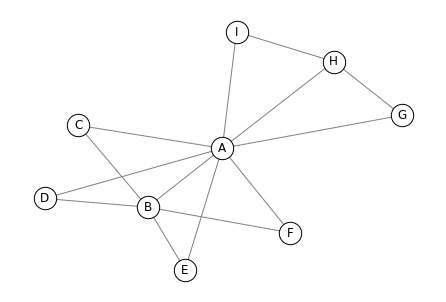

In [2]:
g = nx.Graph()

g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('A', 'D')
g.add_edge('A', 'E')
g.add_edge('A', 'F')
g.add_edge('A', 'G')
g.add_edge('B', 'C')
g.add_edge('B', 'D')
g.add_edge('B', 'E')
g.add_edge('B', 'F')
g.add_edge('G', 'H')
g.add_edge('G', 'A')
g.add_edge('H', 'A')
g.add_edge('A', 'I')
g.add_edge('H', 'I')

# Set the positions of nodes for visualization
pos = nx.spring_layout(g)

# Draw the graph
nx.draw(g, pos, with_labels=True, edge_color='gray')
nodes = nx.draw_networkx_nodes(g, pos, node_size=500, node_color='white')
# Set edge color to red
nodes.set_edgecolor('black')

In [3]:
p1 = [['A','B','C','D','E','F'], ['G','H', 'I']]
p2 = [['B','C','D','E','F'], ['A', 'G', 'H', 'I']]

In [4]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

### Modularity

In [5]:
f"P1 - C1: {modularity(g, p1[0])} C2: {modularity(g, p1[1])}"

'P1 - C1: 0.10331632653061226 C2: 0.0012755102040816334'

In [6]:
f"P2 - C1: {modularity(g, p2[0])} C2: {modularity(g, p2[1])}"

'P2 - C1: 0.011479591836734696 C2: 0.0625'

In [7]:
m1 = min(modularity(g, p1[0]), modularity(g, p1[1]))
m2 = min(modularity(g, p2[0]), modularity(g, p2[1]))

max(m1, m2)

0.011479591836734696

### Conductance

In [8]:
f"P1 - C1: {conductance(g, p1[0])} C2: {conductance(g, p1[1])}"

'P1 - C1: 0.2857142857142857 C2: 0.8571428571428571'

In [9]:
f"P2 - C1: {conductance(g, p2[0])} C2: {conductance(g, p2[1])}"

'P2 - C1: 0.7692307692307693 C2: 0.6666666666666666'

In [10]:
c1 = max(conductance(g, p1[0]), conductance(g, p1[1]))
c2 = max(conductance(g, p2[0]), conductance(g, p2[1]))

min(c1,c2)

0.7692307692307693

## Exercise 2: Threshold Model [4 points]

Given the Graph in Figure 1, apply the threshold model considering the following scenarios:


<b>S1</b>

-Set of initial infected nodes: Infected = \{A\}

-- Threshold: $\tau=\frac{1}{2}$

<b>S2</b>

-Set of initial infected nodes: Infected = \{I\}

--Threshold: $\tau=\frac{1}{3}$ if $degree(n)>2$ else $\tau=\frac{1}{5}$

Consider a node infected at time $t$ if at least $\tau\%$ of its neighbors were already infected at $t-1$

## S1

In [11]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['A'])

# Setting node parameters
threshold = 1/2

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(7)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['A']
Iteration: 1 Infected: ['C', 'D', 'E', 'F', 'G', 'I']
Iteration: 2 Infected: ['B', 'H']
Iteration: 3 Infected: []
Iteration: 4 Infected: []
Iteration: 5 Infected: []
Iteration: 6 Infected: []


## S2

In [12]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['I'])

# Setting node parameters
threshold_1 = 1/3
threshold_2 = 1/5

for i in g.nodes():
    if g.degree(i) > 2:
        config.add_node_configuration("threshold", i, threshold_1)
    else:
        config.add_node_configuration("threshold", i, threshold_2)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(7)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['I']
Iteration: 1 Infected: ['H']
Iteration: 2 Infected: ['G']
Iteration: 3 Infected: ['A']
Iteration: 4 Infected: ['C', 'D', 'E', 'F']
Iteration: 5 Infected: ['B']
Iteration: 6 Infected: []


## Exercise 3: Stream Graph [5 points]

Given the stream graph in Figure 2, answer to the following questions:

- The fastest path(s) between nodes 'a' and 'f' is/are:
-- (A) [(a, b, 0), (b, e, 3), (e, f, 8)];
-- <b>(B)</b> [(a, b, 2), (b, e, 5), (e, f, 8)];
-- (C) [(a, b, 2), (b, e, 5), (e, f, 12)];
-- <b>(D)</b> [(a, b, 2), (b, e, 7), (e, f, 8)].
    

- The foremost path(s) between nodes 'a' and 'f' is/are:
-- <b>(A)</b> [(a, b, 0), (b, e, 3), (e, f, 8)];
-- <b>(B)</b> [(a, b, 2), (b, e, 7), (e, f, 8)];
-- (C) [(a, b, 2), (b, e, 7), (e, f, 12)];
-- (D) [(a, b, 0), (b, e, 3), (e, f, 12)].
  

- Select the wrong sentence(s):
-- <b>(A)</b> The stream graph in the figure is also a link stream because links appear only when nodes are already present;
-- (B) $m = \frac{23}{12}$;
-- <b>(C)</b> There is no node having at least 1 neighbor in each time instant;
-- (D) Node 'c' is present at time $t=12$.
    

- Any stream graph can be aggregated to be represented as a snapshot graph:
-- <b>(A)</b> True
-- (B) False


- Due to their temporal nature, in stream graphs do not exist "connected components":
-- (A) True
-- <b>(B)</b> False

## Exercise 4: Open Question [3 points]

Discuss the possible role of assortative mixing in the formation of polarized environments. Feel free to discuss your preferred opinion dynamics model in relation to this topic.